In [1]:
from data_flywheel.flywheel import DataFlywheel

/root/miniforge-pypy3/envs/data_flywheel/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:17


In [2]:
# Create a configuration dictionary

config = {
    'annotation_parquet': '../train.parquet',
    'image_path': '/workspace/yolo_v8_training/oiv7_full/train/',
    'log_wandb': True,
    'object_class_name': 'car (automobile)',
    'voc_annotations_folder': 'pascal_voc_annotations_car/',
    'wandb_project': 'data-flywheel-testset-car',
    'image_size': 480
}

# Instantiate the DataFlywheel
flywheel = DataFlywheel(config)


04/11/2024 09:03:47 - ERROR - wandb.jupyter -   Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: dnth. Use `wandb login --relogin` to force relogin


INFO     - Loading image annotations... | data_flywheel.flywheel:load_annotations:37


Converting to VOC:   0%|          | 0/4154 [00:00<?, ? imgs/s]

INFO     -   VOC Annotations folder: pascal_voc_annotations_car/ | data_flywheel.flywheel:load_annotations:80
INFO     -   Image folder: /workspace/yolo_v8_training/oiv7_full/train/ | data_flywheel.flywheel:load_annotations:81
wandb: Adding directory to artifact (./pascal_voc_annotations_car)... Done. 3.0s


  0%|          | 0/4154 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/4154 [00:00<?, ?it/s]

INFO     -   Train on 3323 images | data_flywheel.flywheel:load_annotations:114
INFO     -   Validate on 831 images | data_flywheel.flywheel:load_annotations:115


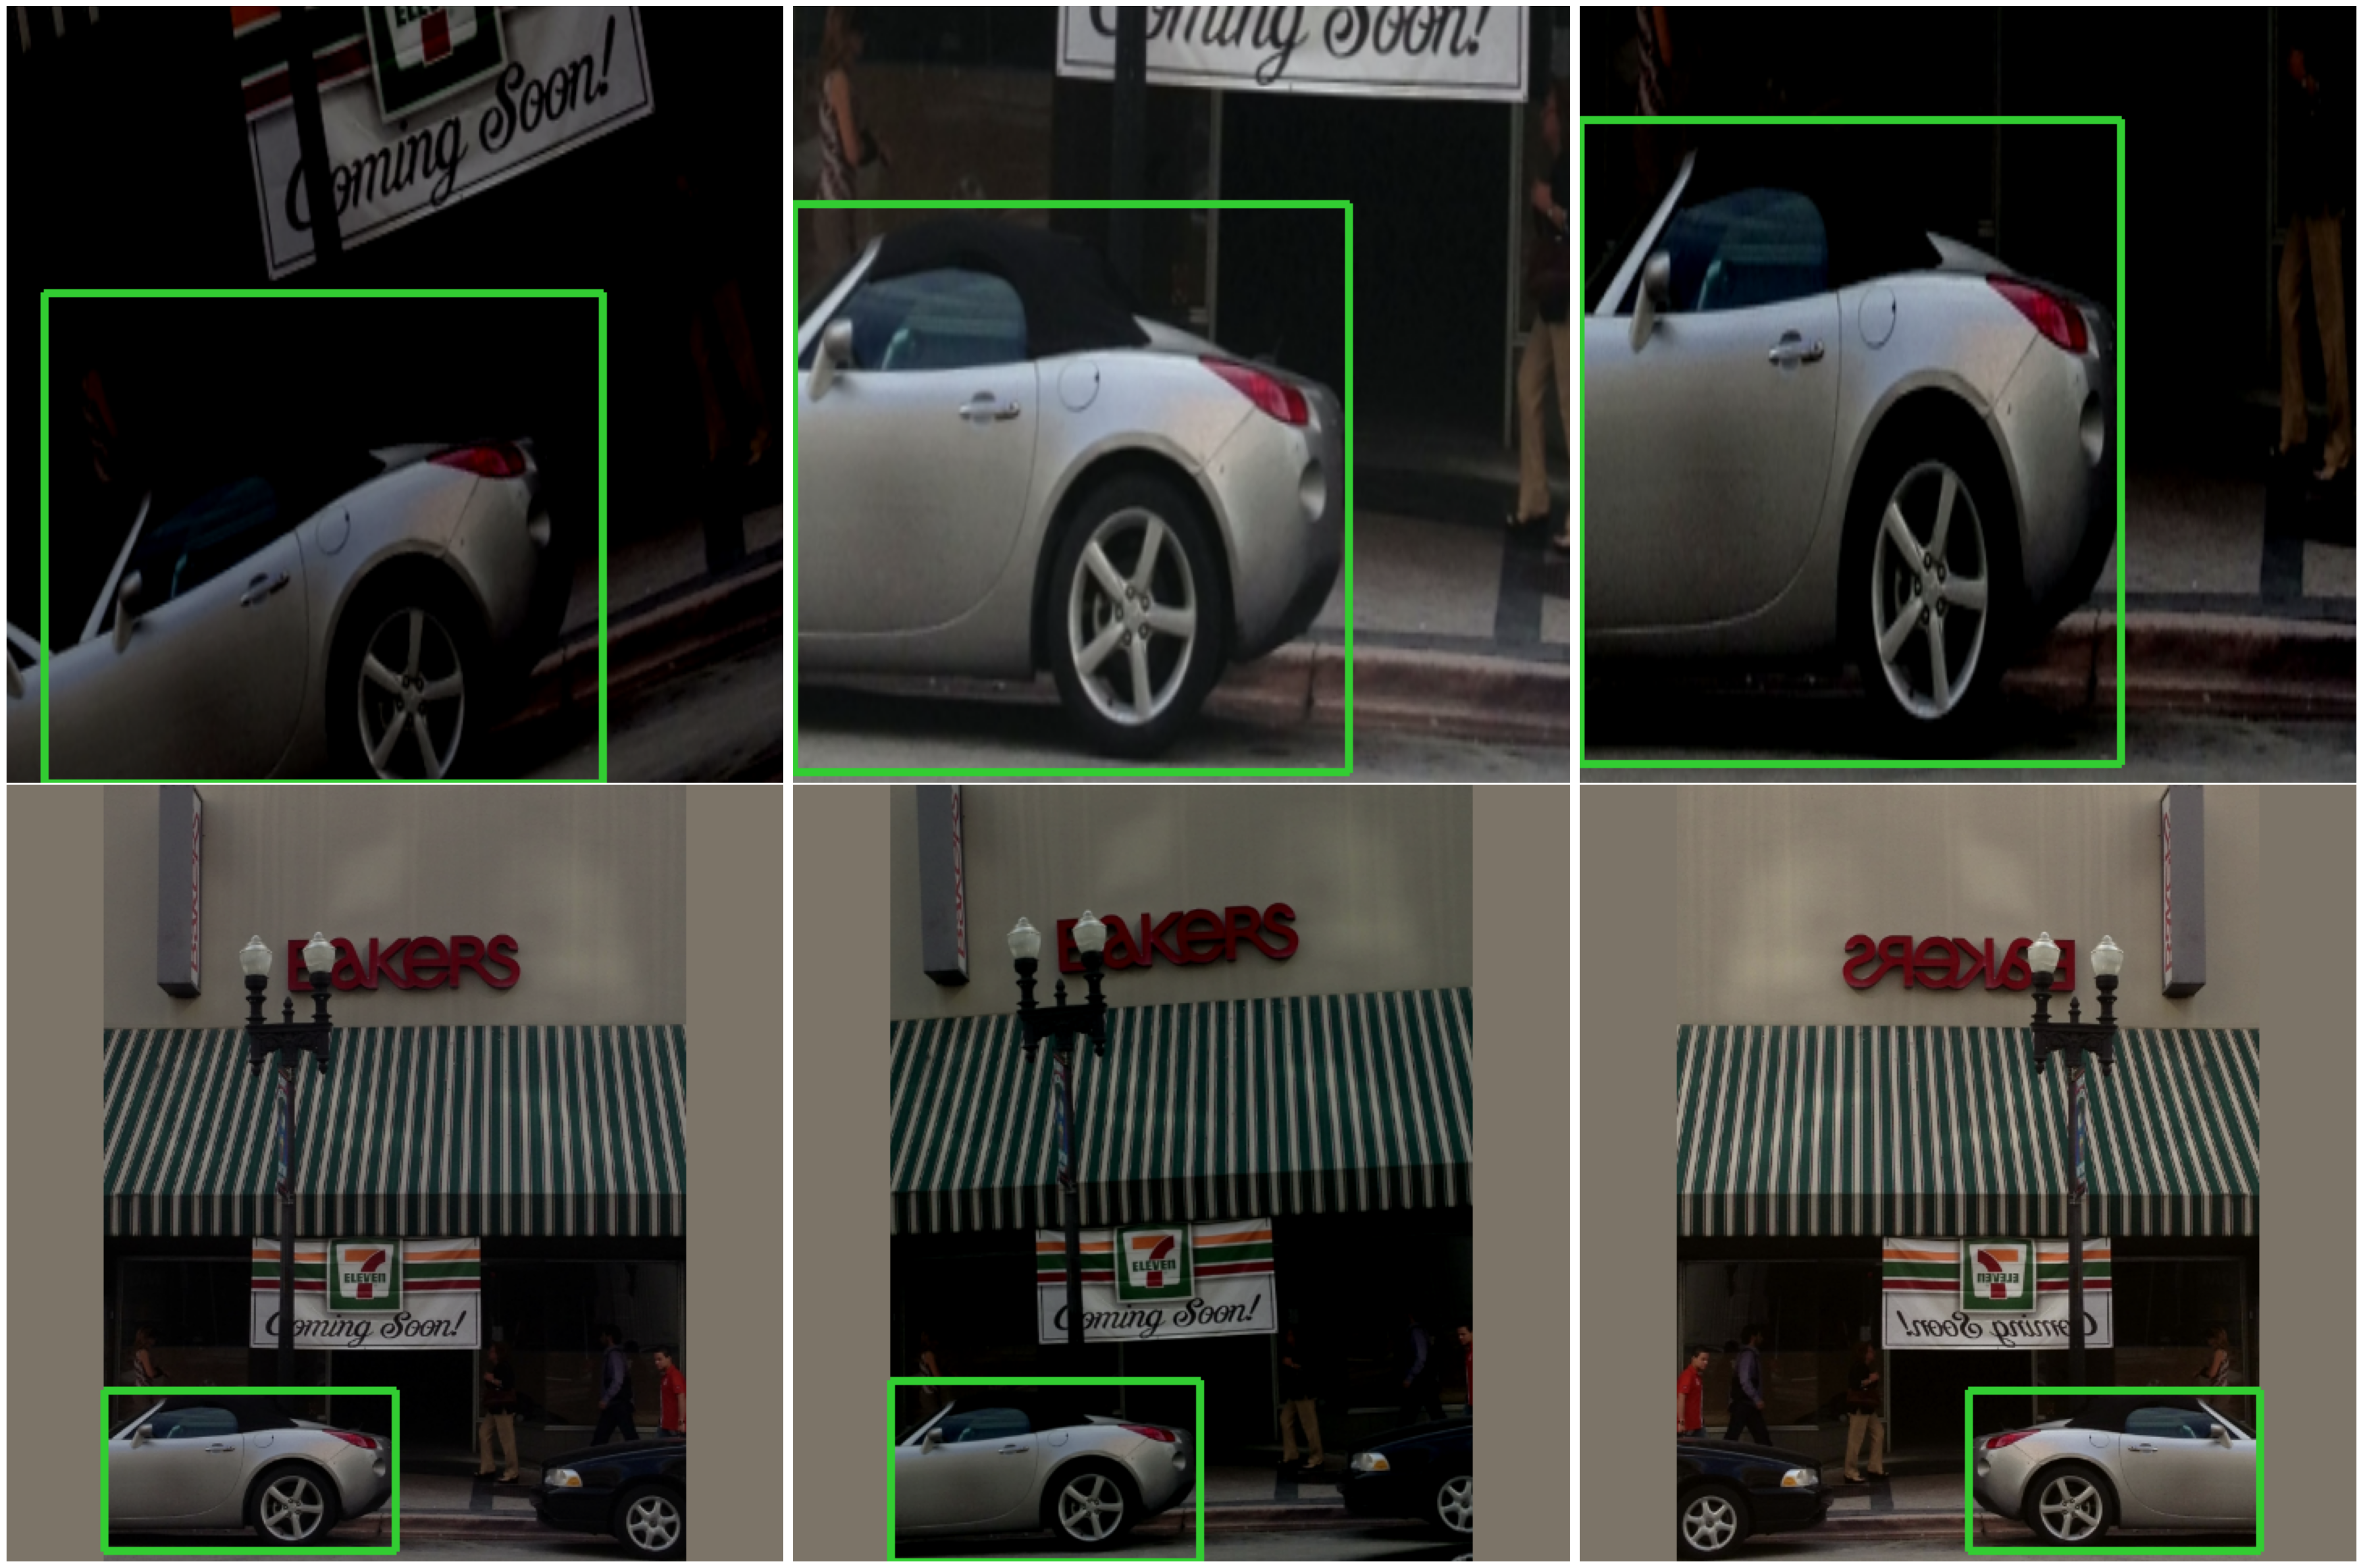

In [3]:
%matplotlib inline
flywheel.load_annotations(show=True, reinit=True)

INFO     - Loading model... | data_flywheel.flywheel:load_model:199
2024-04-11 09:04:38,231 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2024-04-11 09:04:38,232 - mmcv - INFO - load model from: torchvision://resnet50
2024-04-11 09:04:38,234 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2024-04-11 09:04:38,311 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2024-04-11 09:04:38,323 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2024-04-11 09:04:38,352 - mmcv - INFO - initialize VFNetHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'Normal', 'name': 'vfnet_cls', 'std': 0.01, 'bias_prob': 0.01}}
2024-04-11 09:04:38,390 - mmcv - INFO - 
backbone.conv1.weight - torch.Size([64, 3, 7, 7]): 
PretrainedInit: load fr

load checkpoint from local path: checkpoints/vfnet/vfnet_r50_fpn_mstrain_2x_coco_20201027-7cc75bd2.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.vfnet_cls.weight: copying a param with shape torch.Size([80, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([1, 256, 3, 3]).
size mismatch for bbox_head.vfnet_cls.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([1]).


/root/miniforge-pypy3/envs/data_flywheel/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


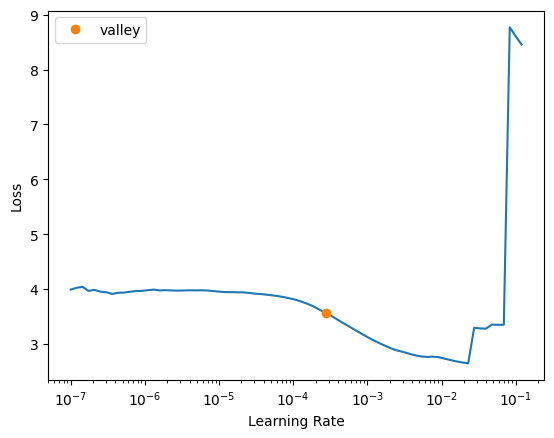

In [4]:
flywheel.load_model()

INFO     - Training model... | data_flywheel.flywheel:train_model:230


Could not gather input dimensions
WandbCallback was not able to prepare a DataLoader for logging prediction samples -> 'Dataset' object has no attribute 'items'


Better model found at epoch 0 with valid_loss value: 0.9631876349449158.


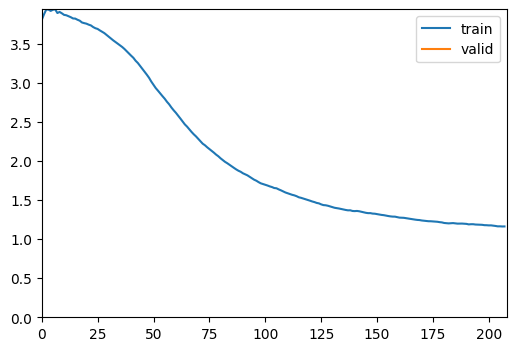

Could not gather input dimensions


Better model found at epoch 0 with valid_loss value: 0.8270763158798218.


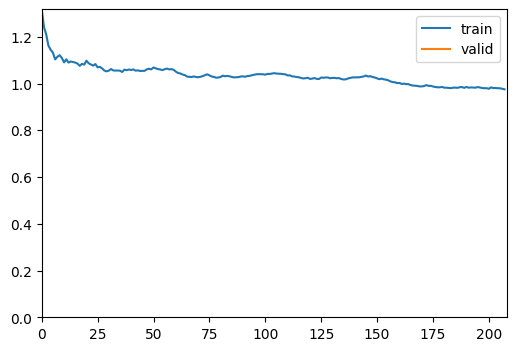

In [5]:
flywheel.train_model(lr=3e-4, epoch=1, freeze_epoch=1)

INFO     - Identifying most incorrect examples... | data_flywheel.flywheel:get_most_wrong:245
INFO     - Losses returned by model: ['loss_cls', 'loss_bbox'] | icevision.models.interpretation:plot_top_losses:220


  0%|          | 0/831 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

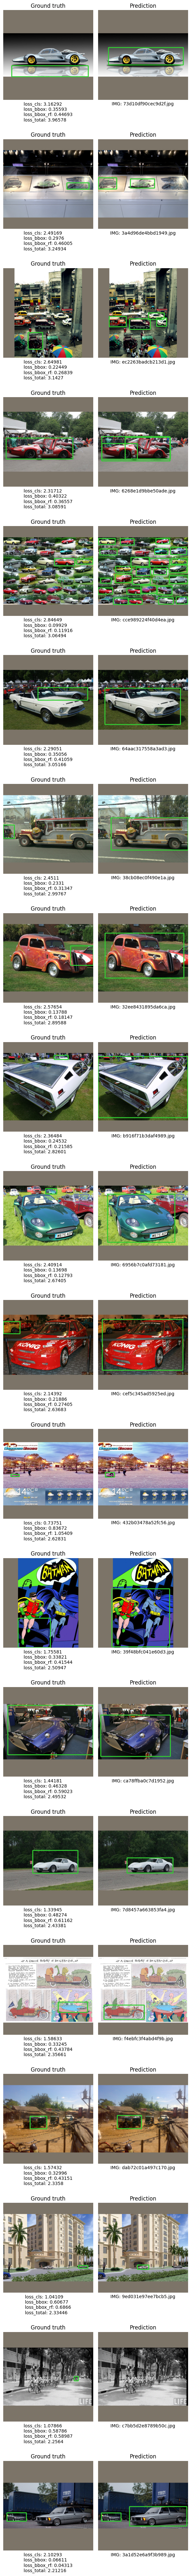

In [6]:
annotations_to_review = flywheel.get_most_wrong(method='top-loss')

In [7]:
len(flywheel.annotations_to_review)

831

In [8]:
flywheel.annotations_to_review

['73d10df90cec9d2f.xml',
 '3a4d96de4bbd1949.xml',
 'ec2263badcb213d1.xml',
 '6268e1d9bbe50ade.xml',
 'cce989224f40d4ea.xml',
 '64aac317558a3ad3.xml',
 '38cb08ec0f490e1a.xml',
 '32ee8431895da6ca.xml',
 'b916f71b3daf4989.xml',
 '6956b7c0afd73181.xml',
 'cef5c345ad5925ed.xml',
 '432b03478a52fc56.xml',
 '39f48bfc041e60d3.xml',
 'ca78ffba0c7d1952.xml',
 '7d8457a663853fa4.xml',
 'f4ebfc3f4abd4f9b.xml',
 'dab72c01a497c170.xml',
 '9ed031e97ee7bcb5.xml',
 'c7bb5d2e8789b50c.xml',
 '3a1d52e6a9f3b989.xml',
 'fcb6e5fbf056d7d1.xml',
 '2cc14758ce413f34.xml',
 '05e49c2d4f75d2f3.xml',
 'e6b8d559a36534b1.xml',
 '2ec0cb26c4015b78.xml',
 '094b0fd3e90b9d6c.xml',
 'b778de31063c80ef.xml',
 'ae4b7b201e6ee6b3.xml',
 'dc8a2cfc4f3553a2.xml',
 '29578b424884757d.xml',
 'cd4f7bc731cfdec0.xml',
 'e6d7d9162f851d75.xml',
 'd577b919b15ff995.xml',
 '25ffddb341a59cef.xml',
 '4288b028cd967606.xml',
 '2b78274afab8ab91.xml',
 '2d5ff50eb401168a.xml',
 'ce9d5cfe5d0c2f94.xml',
 '31cf2b15d679df90.xml',
 '1e8383bfa329ca88.xml',


In [9]:
flywheel.relabel_data()

INFO     - Launching streamlit to review annotations... | data_flywheel.flywheel:relabel_data:272
INFO     - Review annotations here: http://0.0.0.0:8501 | data_flywheel.flywheel:relabel_data:273


KeyboardInterrupt: 

In [ ]:
## Export to fastdup format

flywheel.export_annotations('export.parquet')